In [ ]:
# # general imports
# import os
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt 
# from matplotlib.colors import ListedColormap
# import seaborn as sns

# # from our documents
import information as infor
# import data_cleaning_functions as dcf
# import feature_engineering_functions as fef

# # from Scikit Learn library
# from sklearn.preprocessing import OneHotEncoder, RobustScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import random

# #seed for random processes
# seed = 42
# np.random.seed(seed)
# random.seed(seed)


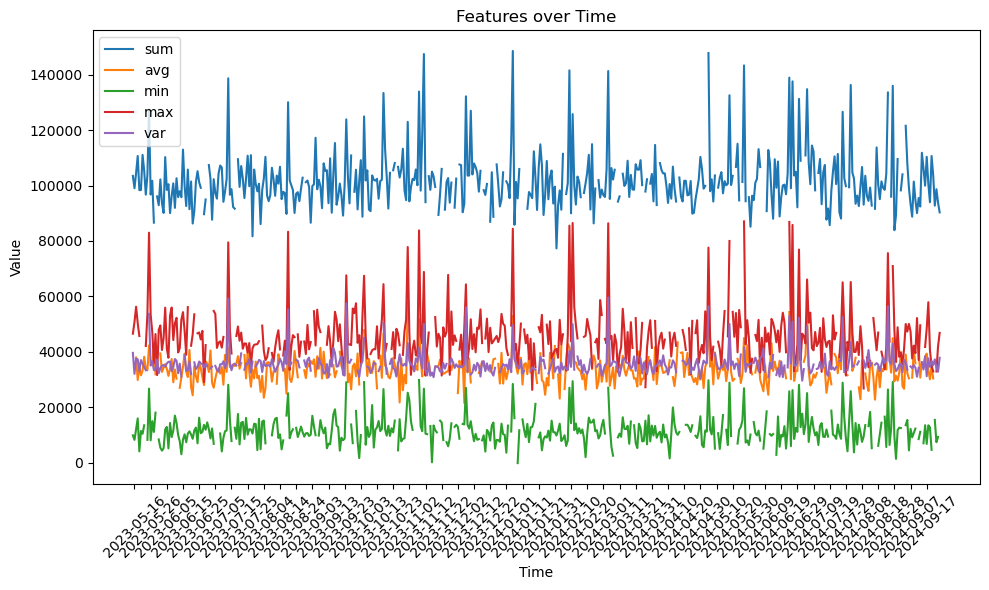

c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to co

In [ ]:
from information import machine, kpi, features, identity
import numpy as np
import pandas as pd
from information import infoManager

# Dictionary used to mantain a local version of the original kpis in order to handle the specific batches useful for the imputation and the data drift analysis.
info = {}

for m in list(machine.keys()):
    info_asset = {}  # Reset for each machine
    for id in list(machine[m]):
        info_kpi = {}  # Reset for each asset
        for k in list(kpi.keys()):
            info_op={}
            for o in kpi[k][1]:
                info_op[o] = [[[], [], [], [], []], [0, 0, 0, 0, 0],[], []]  # [0]: batch ([0][0]: 'sum', [0][1]: 'avg', [0][2]: 'min', [0][3]: 'max', [0][4] 'var'
                                                                          # [1]: counter for missing values (same subdivision of the batch)
                                                                          # [2]: trained model for anomaly detection.
            info_kpi[k] = info_op
        info_asset[id] = info_kpi  # Associate KPIs with the asset ID
    info[m] = info_asset  # Associate assets with the machine type

im=infoManager(info)    

# At the end we have a nested dictionary where the atomic element can be retrieved as:
# info['machine_type']['asset_id']['kpi']['operation'] --> [batch, counter]
# The batch is a list of 5 sub-lists each containing the batch corrisponding to a specific features


# This part will generate the stream
n_points = 500
from datetime import datetime, timedelta, timezone

# Start date
start_date = datetime(2023, 5, 15, 00, 00, 00, tzinfo=timezone.utc)
np.random.seed(42)
# Generate normal data (mean=0, std=1) with outliers
normal_data=[]
probability_of_nan = 0.1 
anomaly_probability=0.05
non_nan_indices=[]

normal_data.append(np.random.normal(100000, 7000, n_points)) #sum #86400  
nan_mask = np.random.rand(n_points) < probability_of_nan
nan_mask[0]=False
normal_data[0][nan_mask] = np.nan
non_nan_indices.append(list(np.where(~nan_mask)[0]))

normal_data.append(np.random.normal(33100, 4000, n_points)) #avg 
nan_mask = np.random.rand(n_points) < probability_of_nan
nan_mask[0]=False
normal_data[1][nan_mask] = np.nan
non_nan_indices.append(list(np.where(~nan_mask)[0]))

normal_data.append(np.random.normal(11000, 3700, n_points)) #min 
nan_mask = np.random.rand(n_points) < probability_of_nan
nan_mask[0]=False
normal_data[2][nan_mask] = np.nan
non_nan_indices.append(list(np.where(~nan_mask)[0]))

normal_data.append(np.random.normal(44200, 6000, n_points)) #max 
nan_mask = np.random.rand(n_points) < probability_of_nan
nan_mask[0]=False
normal_data[3][nan_mask] = np.nan
non_nan_indices.append(list(np.where(~nan_mask)[0]))

normal_data.append(np.random.normal(35000, 2000, n_points)) #var
nan_mask = np.random.rand(n_points) < probability_of_nan
nan_mask[0]=False
normal_data[4][nan_mask] = np.nan
non_nan_indices.append(list(np.where(~nan_mask)[0]))

possible_anomaly_indeces=list(set(non_nan_indices[0]).intersection(non_nan_indices[1], non_nan_indices[2], non_nan_indices[3], non_nan_indices[4]))
anomaly_indices = np.random.choice(possible_anomaly_indeces, size=int(n_points * anomaly_probability), replace=False)
normal_data[0][anomaly_indices] = 150000*np.random.uniform(0.8, 1, size=int(n_points * anomaly_probability))
normal_data[1][anomaly_indices] = 50000*np.random.uniform(0.8, 1.2, size=int(n_points * anomaly_probability))
normal_data[2][anomaly_indices] = 25000*np.random.uniform(1, 1.2, size=int(n_points * anomaly_probability))
normal_data[3][anomaly_indices] = 80000*np.random.uniform(0.8, 1.1, size=int(n_points * anomaly_probability))
normal_data[4][anomaly_indices] = 50000*np.random.uniform(0.8, 1.2, size=int(n_points * anomaly_probability))

p_o=5
anomalies_indices = np.random.choice(n_points, size=int((p_o/100)*n_points), replace=False)  
for i in range(5): 
    normal_data[i][anomalies_indices] += np.random.normal(10, 5, int((p_o/100)*n_points))  


times=[(start_date + timedelta(days=i)).isoformat(timespec='seconds') for i in range(n_points)]
anomaly_times = [times[i] for i in anomaly_indices]

# Create a DataFrame with the time index
data = pd.DataFrame({
    'time': times,
    'asset_id':  'ast-yhccl1zjue2t',
    'name': 'metal_cutting',
    'kpi': 'time',
    'operation': 'working',
    'sum': normal_data[0],
    'avg': normal_data[1],
    'min': normal_data[2],
    'max': normal_data[3],
    'var': normal_data[4]})

data_init=data.iloc[:data.shape[0]//2]
data_rt=data.iloc[data.shape[0]//2:]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for f in features:
    plt.plot(data['time'].str[:10], data[f], label=f)

plt.title('Features over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(range(1, n_points, 10))
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This piece simulates the cleaning point by point --> i stop at half the dataset to have enough data to train the anomaly detector.
from data_cleaning_functions import cleaning_pipeline
for i in data_init.index.to_list():
   dp=data_init.iloc[i].to_dict()
   #print(f'original data point: {dp}')
   data.iloc[i]=cleaning_pipeline(dp, im)


from machine_learning_functions import AnomalyDetector
ad=AnomalyDetector()
model=ad.train(data_init)
im.update_model_ad(data_init.iloc[0], model)

from machine_learning_functions import tdnn_forecasting_training
from machine_learning_functions import tdnn_forecasting_prediction
model_info = tdnn_forecasting_training(data_init)  #contains [best_model_TDNN, best_params, stats]
im.update_model_forecast(data_init.iloc[0], model_info)

import feature_engineering_functions as fef
# This in general has to be made for all the kpis that we retireve from meachine, i.e., all kpis for all machines.


The following pipeline aims to automatize the preprocessing of the stream data from time series.

We will assume that we already have part of the dataset, that will be used as historical data to fill missing values or study seasonalities and stationarities.

This will particular show what to do whenever new data arrive to the system.

# Initial setup

In [ ]:
# file_path = 'smart_app_data.pkl'
# df = pd.read_pickle(file_path)

In [ ]:

# # Ensure 'time' column is in datetime format
# df['time'] = pd.to_datetime(df['time'])

# # Sort the dataframe by 'time'
# df = df.sort_values(by='time')

# # Define the cutoff date for historical and incoming data
# cutoff_date = pd.Timestamp('2024-10-01')

# # Split data into historical (before October 2024) and incoming (after October 2024)
# # Define the conditions correctly using & and | operators and parentheses for grouping
# historical_data = df[(df['time'].dt.year < 2024) | ((df['time'].dt.year == 2024) & (df['time'].dt.month < 10))]
# incoming_data = df[(df['time'].dt.year > 2024) | ((df['time'].dt.year == 2024) & (df['time'].dt.month >= 10))]

# # Check the first few rows of each dataset to confirm
# print("Historical Data (before October 2024):")
# print(historical_data.head())

# print("\nIncoming Data (after October 2024):")
# print(incoming_data.head())

In [ ]:
# # Check the lengths to confirm the split
# print(f"\nNumber of rows in historical data: {len(historical_data)}")
# print(f"Number of rows in incoming data: {len(incoming_data)}")

# # Check first and last rows of historical and incoming data
# print(f"First row in historical data: {historical_data.iloc[0]['time']}")
# print(f"Last row in historical data: {historical_data.iloc[-1]['time']}")

# print(f"\nFirst row in incoming data: {incoming_data.iloc[0]['time']}")
# print(f"Last row in incoming data: {incoming_data.iloc[-1]['time']}")



Number of rows in historical data: 47936
Number of rows in incoming data: 4256
First row in historical data: 2024-03-01 00:00:00+00:00
Last row in historical data: 2024-09-30 00:00:00+00:00

First row in incoming data: 2024-10-01 00:00:00+00:00
Last row in incoming data: 2024-10-19 00:00:00+00:00


In [ ]:
# # Divide data by machine and kpis (time series)
# # Retrieve unique machines and KPIs from the DataFrame
# machines = df['name'].unique().tolist()

# print("All machines are: ")
# print(machines)

# kpis = df['kpi'].unique().tolist()

# print("All KPIs are: ")
# print(kpis)

All machines are: 
['Large Capacity Cutting Machine 1', 'Assembly Machine 2', 'Laser Cutter', 'Riveting Machine', 'Assembly Machine 3', 'Medium Capacity Cutting Machine 1', 'Medium Capacity Cutting Machine 2', 'Low Capacity Cutting Machine 1', 'Testing Machine 3', 'Medium Capacity Cutting Machine 3', 'Testing Machine 1', 'Testing Machine 2', 'Laser Welding Machine 1', 'Laser Welding Machine 2', 'Large Capacity Cutting Machine 2', 'Assembly Machine 1']
All KPIs are: 
['working_time', 'consumption_idle', 'consumption_working', 'power', 'consumption', 'offline_time', 'idle_time', 'cost', 'cost_working', 'cost_idle', 'cycles', 'good_cycles', 'bad_cycles', 'average_cycle_time']


# Preprocessing pipeline

The pipeline will receive as an input the new incoming data for a specific machine and kpi. Also, to perform the preprocessing it need also to receive the batch of a fixed amount of past data and the information about how specifically handle that kpi for that machine (given by kwargs). 

In [ ]:
from machine_learning_functions import ADWIN_drift
data_rt['anomaly']='Normal'
ad=AnomalyDetector()

for i in range(data_rt.shape[0]):
    current_dp=data_rt.iloc[i]

    current_dp=cleaning_pipeline(current_dp, im)

    drift_flag=ADWIN_drift(current_dp, im)
    
    if drift_flag==True:
        #retrain anomaly detection model
        model=ad.train(data_rt[:i])
        im.update_model_ad(current_dp, model)
        #retrain forecasting algorithm model
        model_info = tdnn_forecasting_training(data_rt[:i])  #contains [best_model_TDNN, best_params, stats]
        im.update_model_forecast(current_dp, model_info)
        
    #Anomalies detection branch    
    ad_model=im.get_model_ad(current_dp)
    transformed_dp = fef.feature_engineering_pipeline(current_dp, infor.ML_algorithms_config)
    data_rt['anomaly'].iloc[i]=ad.predict(transformed_dp , ad_model)
    #Send to database should be implemented
    #Send alert should be implemented

    #Feature forecasting branch
    #Activation whenever there is a call
    #num_predictions comes from the query
    num_predictions = 7 #default
    forecasting_model_info=im.get_model_forecast(current_dp)
    transformed_dp = fef.feature_engineering_pipeline(current_dp, infor.ML_algorithms_config)
    forecasting_model = forecasting_model[0]
    forecasting_params = forecasting_model[1]
    forecasting_stats = forecasting_model[2]
    predictions = tdnn_forecasting_prediction(forecasting_model, forecasting_params['tau'], transformed_dp , num_predictions, forecasting_stats)
    #Send prediction should be implemented

    #The feature engineering will be added in a future development.

# The concept is that every day we expect each time a new value of a different kpi. the reasonament is that the algorithm
# is able to clean it according to the general format and also to check the range specifically for its identity. Then the algorithm 
# will call the infoManager to get the previously trained model for the specific kpi we are receiving and it will predict whether it is an anomaly or not. 

C:\Users\mcapo\AppData\Local\Temp\ipykernel_4164\3755585193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rt['anomaly']='Normal'
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\mcapo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mcapo\AppData\Local\Temp\ipykernel_4164\3755585193.py:6: FutureWarning: ChainedAssign

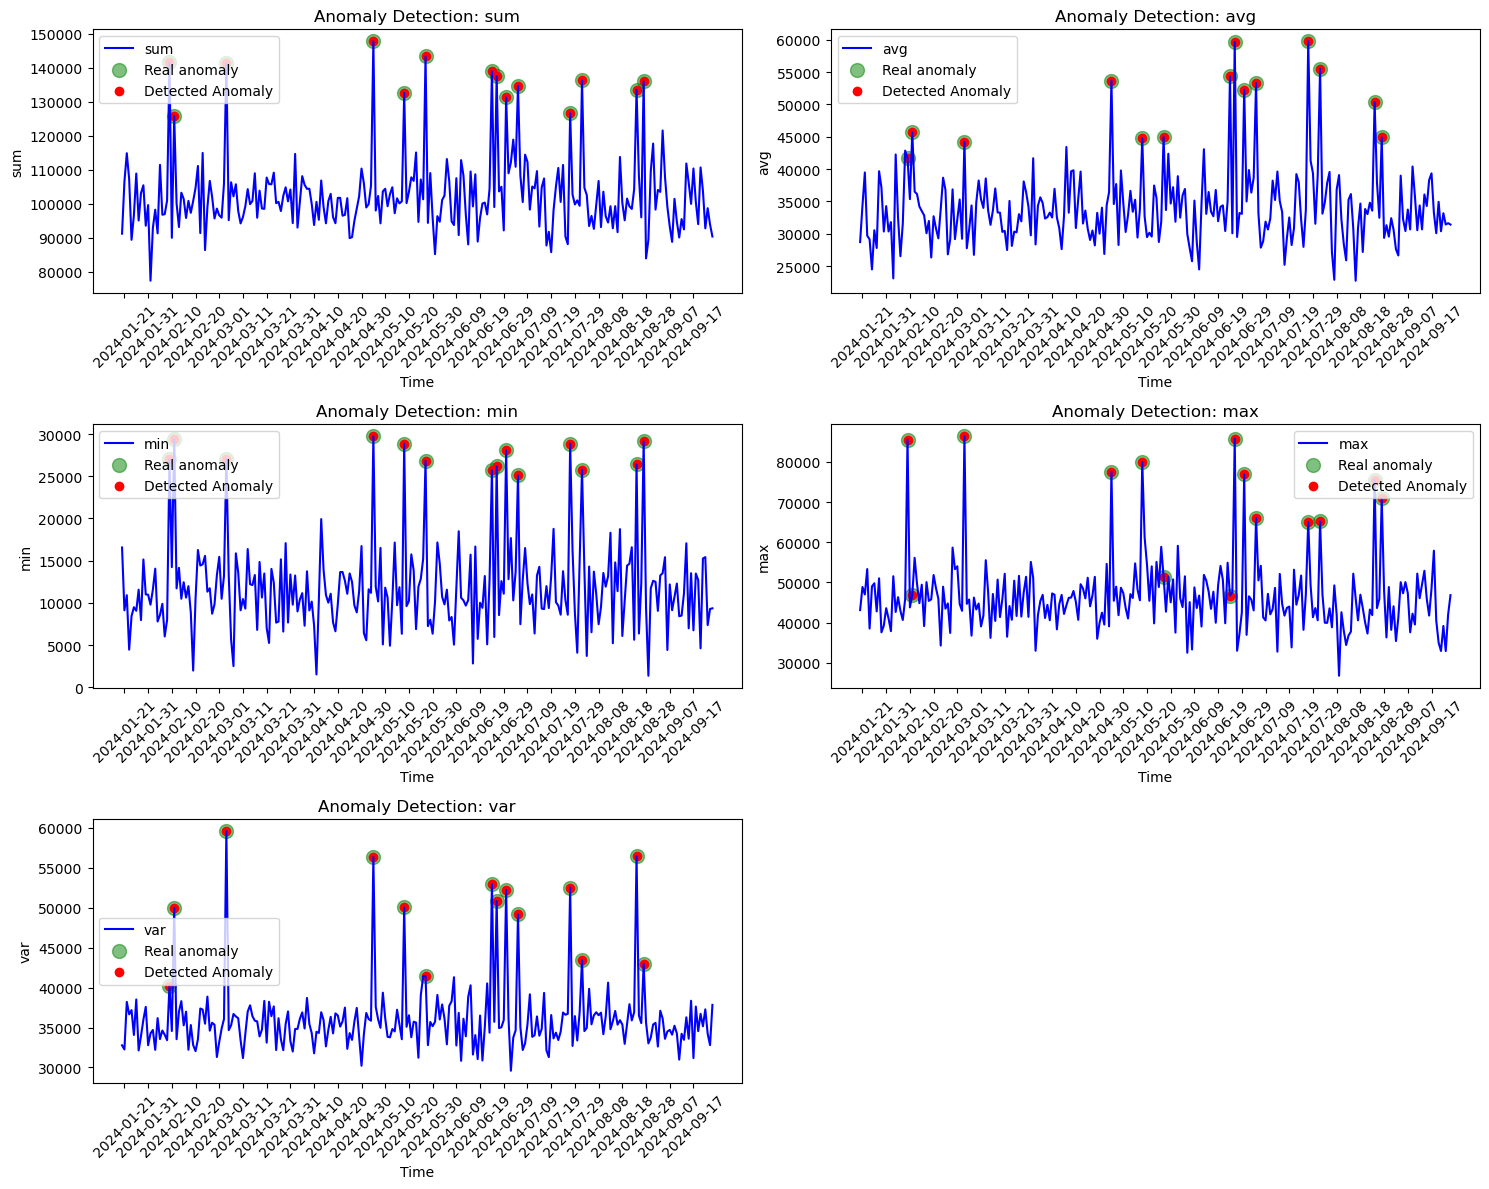

In [ ]:
# Visualization of the detected anomalies and the real anomalies i artificiously injected into the timeseries.
rows = 3  
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten() 

for i, ff in enumerate(features):
    ax = axes[i]
    
    ax.plot(data_rt['time'].str[:10], data_rt[ff], label=ff, color='blue')
    ax.scatter(data_rt[data_rt['time'].isin(anomaly_times)]['time'].str[:10], data_rt[data_rt['time'].isin(anomaly_times)][ff], color='green', label='Real anomaly', s=100, alpha=0.5)
    
    ax.scatter(data_rt['time'][data_rt['anomaly'] == 'Anomaly'].str[:10], 
               data_rt[ff][data_rt['anomaly'] == 'Anomaly'], 
               color='red', label='Detected Anomaly')
    
    ax.set_xlabel('Time')
    ax.set_ylabel(ff)
    ax.set_title(f'Anomaly Detection: {ff}')
    ax.set_xticks(range(1, data_rt.shape[0], 10))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    
# Remove empty subplots if features < 6
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()